# Day7 practice Assignments:
 
1.	Develop a predictive maintenance model using LSTM-RNN to forecast equipment failures, enabling proactive maintenance and reducing downtime.
Note: Download any dataset  to satisfy the problem statement


In [ ]:
import numpy as np
import pandas as pd

# creating a synthetic dataset
"""
In this synthetic dataset:

EquipmentState: Binary values indicating equipment state (1 for working, 0 for failure).
SensorReadings: Synthetic sensor readings as features.
"""
# Function to generate synthetic dataset for predictive maintenance
def generate_predictive_maintenance_dataset(num_samples=100, num_sensors=5):
    np.random.seed(42)  # For reproducibility

    # Generate random equipment states (0 or 1)
    equipment_states = np.random.randint(2, size=num_samples)

    # Generate random sensor readings for each sensor
    sensor_readings = {f'Sensor_{i}': np.random.rand(num_samples) * 10 for i in range(num_sensors)}

    # Create a DataFrame
    df = pd.DataFrame({'EquipmentState': equipment_states, **sensor_readings})

    return df

# Generate synthetic dataset with 50 samples and 3 sensors
predictive_maintenance_dataset = generate_predictive_maintenance_dataset(num_samples=50, num_sensors=3)

# Save the dataset to a CSV file
predictive_maintenance_dataset.to_csv('predictive_maintenance_dataset.csv', index=False)


In [19]:
# Display the first few rows of the generated dataset
print(predictive_maintenance_dataset.head())

   EquipmentState  Sensor_0  Sensor_1  Sensor_2
0               0  7.851760  7.290072  4.271078
1               1  1.996738  7.712703  8.180148
2               0  5.142344  0.740447  8.607306
3               0  5.924146  3.584657  0.069521
4               0  0.464504  1.158691  5.107473


In [20]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [21]:
# Load the dataset
dataset = pd.read_csv('predictive_maintenance_dataset.csv')

# Data Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset.iloc[:, 1:])

In [24]:
# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# Set the sequence length (adjust as needed)
sequence_length = 5

# Create sequences for LSTM
sequences, labels = create_sequences(scaled_data, sequence_length)

In [25]:
# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(len(sequences) * split_ratio)

train_sequences, test_sequences = sequences[:split_index], sequences[split_index:]
train_labels, test_labels = labels[:split_index], labels[split_index:]

In [26]:
# LSTM Model Building
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, dataset.shape[1]-1)))
model.add(Dense(dataset.shape[1]-1))
model.compile(optimizer='adam', loss='mse')

In [27]:
# Train the model
model.fit(train_sequences, train_labels, epochs=50, batch_size=16, verbose=1)

Epoch 1/50
3/3 [==============================] - 8s 10ms/step - loss: 0.2946
Epoch 2/50
3/3 [==============================] - 0s 7ms/step - loss: 0.2730
Epoch 3/50
3/3 [==============================] - 0s 8ms/step - loss: 0.2514
Epoch 4/50
3/3 [==============================] - 0s 8ms/step - loss: 0.2300
Epoch 5/50
3/3 [==============================] - 0s 20ms/step - loss: 0.2097
Epoch 6/50
3/3 [==============================] - 0s 7ms/step - loss: 0.1881
Epoch 7/50
3/3 [==============================] - 0s 8ms/step - loss: 0.1673
Epoch 8/50
3/3 [==============================] - 0s 8ms/step - loss: 0.1477
Epoch 9/50
3/3 [==============================] - 0s 18ms/step - loss: 0.1285
Epoch 10/50
3/3 [==============================] - 0s 20ms/step - loss: 0.1145
Epoch 11/50
3/3 [==============================] - 0s 15ms/step - loss: 0.1032
Epoch 12/50
3/3 [==============================] - 0s 9ms/step - loss: 0.0988
Epoch 13/50
3/3 [==============================] - 0s 8ms/step - los

In [28]:
# Model Evaluation
train_predictions = model.predict(train_sequences)
test_predictions = model.predict(test_sequences)

1/1 [==============================] - 0s 185ms/step


In [29]:
# Inverse transform the predictions to the original scale
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

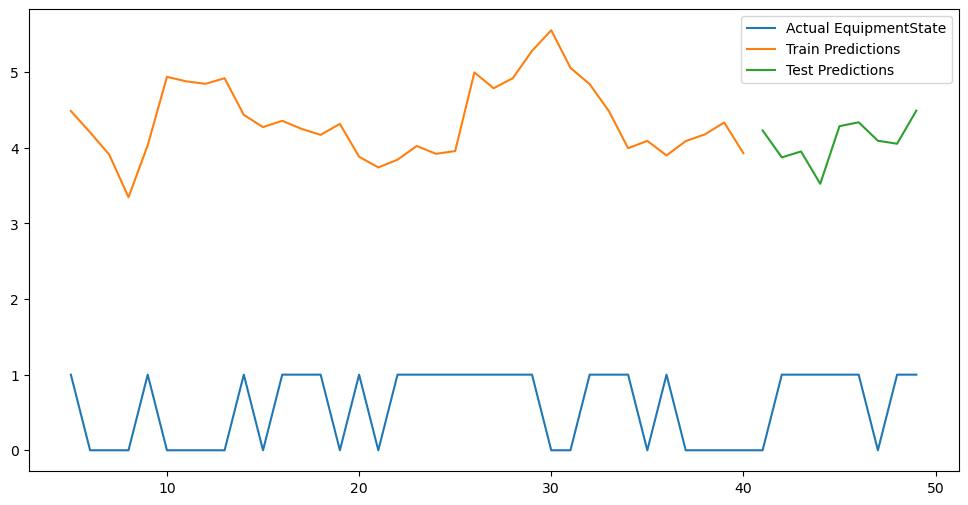

In [30]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(dataset['EquipmentState'][sequence_length:], label='Actual EquipmentState')
plt.plot(np.arange(sequence_length, len(train_predictions) + sequence_length), train_predictions[:, 0], label='Train Predictions')
plt.plot(np.arange(split_index + sequence_length, split_index + len(test_predictions) + sequence_length), test_predictions[:, 0], label='Test Predictions')
plt.legend()
plt.show()

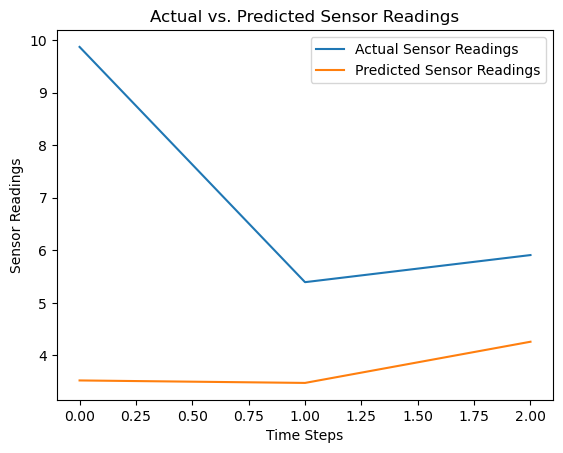

In [32]:
# Select a random test sample
sample_index = np.random.randint(len(test_predictions))
actual_values = scaler.inverse_transform(test_labels)[sample_index]
predicted_values = test_predictions[sample_index]

# Plot actual vs. predicted sensor readings
plt.plot(actual_values, label='Actual Sensor Readings')
plt.plot(predicted_values, label='Predicted Sensor Readings')
plt.title('Actual vs. Predicted Sensor Readings')
plt.xlabel('Time Steps')
plt.ylabel('Sensor Readings')
plt.legend()
plt.show()


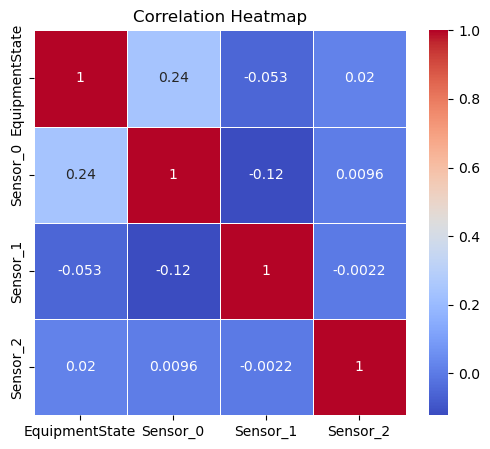

In [37]:
import seaborn as sns

# Create a correlation matrix
correlation_matrix = dataset.corr()

# Plot correlation heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()
